In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import copy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000) 

In [2]:
df1 = pd.read_csv('Email_Spam_Ham.csv', encoding = 'iso-8859-1')

In [3]:
df1.head(3)

,Unnamed: 0,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
df1.shape

(5572, 6)

In [5]:
# Dropping unwanted columns
df = df1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [6]:
df.head(3)

,Unnamed: 0,v1,v2
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   v1          5572 non-null   object
 2   v2          5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [8]:
df['v2'].isnull().sum()

0

In [9]:
df['v1'].isnull().sum()

0

# Data Cleaning:

1) Detect which language it is and make the separate dataframe for each language
2) Remove the puncutiation marks, numbers ..etc
3) Make the Lower case
4) Remove the stop words
5) Lemittization
6) Find a way to convert text data to numeric data

### 1) Detecting the language in each row of the text column

In [10]:
from langdetect import detect
detect("War doesn't show who's right, just who's left.")

'en'

In [11]:
# Here I am not able to detect the language in the v2 column because there may be some empty rows or ????? or numbers .....etc

# Then how to get that rows and their index position : below is the code 


all = []
for row in df['v2']:
    try:
        language = detect(row)
    except:
        language = "error"
        index = df.index[df["v2"] == row].tolist()
        print(f"This row number : {index} throws error because row is:- {row}")
#     row.append(language)
        all.append(row)

This row number : [1611] throws error because row is:- 645
This row number : [3374] throws error because row is:- :) 
This row number : [4822] throws error because row is:- :-) :-)


In [12]:
# Making a separate column Language which displays the name of the language in each row
# we can do this only after removing that rows which we got errors

# df['Language'] = df['v2'].apply(lambda x: detect(x))

### 2) Removing punctuation, digits, spaces, and  making lower case

In [13]:
import string

df['v2'] = df['v2'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

In [14]:
# removing digits

df['v2'] = df['v2'].apply(lambda x: ''.join([i for i in x if i not in string.digits]))

In [15]:
# removing spaces from data

df['v2'] = df['v2'].apply(lambda x: ' '.join(x.split()))

In [16]:
# making the Lower case

df['v2'] = df['v2'].apply(lambda x: x.lower())

### 4) Removing stop words

In [17]:
# Stop words from spacy library
from spacy.lang.en.stop_words import STOP_WORDS

df['v2'] = df['v2'].apply(lambda x: ' '.join([i for i in x.split() if i not in STOP_WORDS]))

### 5) Lemmatization

In [18]:
# usig spacy
import spacy
en_core = spacy.load('en_core_web_sm')

df['v2'] = df['v2'].apply(lambda x : " ".join([y.lemma_ for y in en_core(x)]))

### 6) Converting text data into numeric data

In [19]:
df.shape

(5572, 3)

In [20]:
df.head(2)

,Unnamed: 0,v1,v2
0,0,ham,jurong point crazy available bugis n great wor...
1,1,ham,ok lar joke wif u oni


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features = 2500)

tfidf_vectors = vec.fit_transform(df['v2'])

In [22]:
new_df = pd.DataFrame(tfidf_vectors.toarray(), columns = vec.get_feature_names())
new_df.head()

,aah,aathilove,aathiwhere,abi,abiola,able,abt,abta,ac,academic,acc,accept,access,accident,accidentally,account,ache,acoentry,act,action,activate,activity,actually,ad,add,addamsfa,addie,address,admirer,adore,adoring,adult,advance,adventure,advice,advise,ae,affair,affection,affectionate,afraid,aft,afternoon,aftr,agalla,age,ago,agree,ah,aha,...,wwwldewcomwinppmxage,wwwmovietriviatv,wwwringtonescouk,wwwtcbiz,wwwtextcompcom,wwwtextpodnet,wwwtxtcom,wwx,wylie,xam,xchat,xma,xmas,xpwk,xuhui,xx,xxx,xxxxx,xxxxxxx,xxxxxxxxx,xy,ya,yahoo,yan,yar,yay,yeah,year,yep,yer,yes,yeshe,yest,yesterday,yetunde,yijue,ym,yo,yoga,yogasana,yor,you,youclean,yr,yrs,yummy,yun,yuo,yup,ze
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Analysing Target column

In [23]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

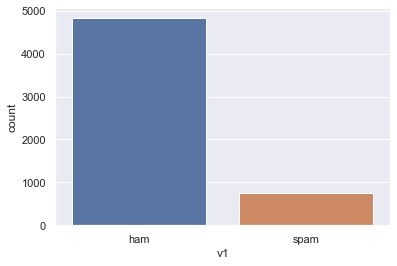

In [24]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="v1", data=df)

Since the target column is not balanced we need to do under or oversamapling

In [25]:
# converting categorical data into numeric

df['v1_new'] = df['v1'].map({'ham':0, 'spam':1})

In [26]:
df.head()

,Unnamed: 0,v1,v2,v1_new
0,0,ham,jurong point crazy available bugis n great wor...,0
1,1,ham,ok lar joke wif u oni,0
2,2,spam,free entry wkly comp win fa cup final tkts st ...,1
3,3,ham,u dun early hor u c,0
4,4,ham,nah do nt think go usf life,0


## Oversampling using smotetomek

In [27]:
X = new_df

In [28]:
y = df['v1_new']

In [29]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 42)
X_res, y_res = smk.fit_resample(X, y)

In [30]:
from collections import Counter

print("Original Dataset Shape {}".format(Counter(y)))
print("Resampled Dataset Shape {}".format(Counter(y_res)))

Original Dataset Shape Counter({0: 4825, 1: 747})
Resampled Dataset Shape Counter({0: 4825, 1: 4825})


In [31]:
X_res.shape

(9650, 2500)

In [32]:
type(X_res)

pandas.core.frame.DataFrame

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

# Logestic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 200)
log_model = log.fit(X_train, y_train)


y_pred = log_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9455958549222798


# KNN Classifier

In [35]:
#First we take k value 1 then we check the model then in the below we can understand how to select k value

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors is the k value
knn_model = knn.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.778238341968912


In [36]:
# predicting the right k value
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

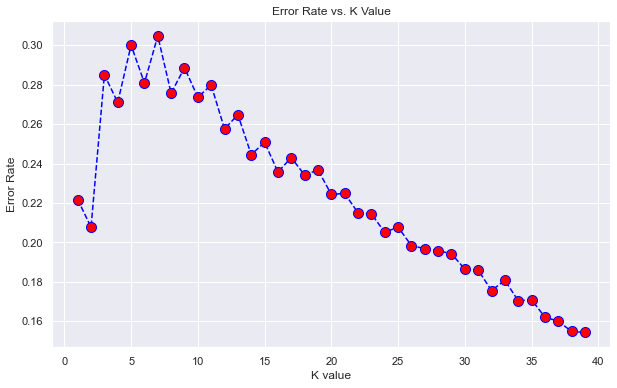

In [37]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

As we can see in the graph at k value 38 the error rate is less and it is stable to some extinct so we can select k value as 38

In [38]:
# making K value as 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 38) # n_neighbors is the k value
knn_model = knn.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.8450777202072539


# Naive Bayes - Gaussian

In [39]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9160621761658031


# Naive Bayes Multinomial

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb_model1 = MultinomialNB()
nb_model1.fit(X_train, y_train)

y_pred_m = nb_model1.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred_m, y_test)
print(score)

0.966839378238342


# SVM (Linear)

In [41]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
svm_model = classifier.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9756476683937824


# SVM (RBF)

In [42]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
svm_model_rbf = classifier.fit(X_train, y_train)

y_pred = svm_model_rbf.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9896373056994818


# Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9689119170984456


# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9849740932642487


# Ada Boost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab_model = ab.fit(X_train, y_train)

y_pred = ab_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9637305699481865


# XG-Boost

In [46]:
import xgboost
xg = xgboost.XGBClassifier()
xgboost_model = xg.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

[13:16:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.977720207253886


# **Conclusion**

When we compare the scores of all models, for SVM (RBF) and RandomForest classifier we got high accuracy score